# integ_ode
+ [Numerical integration](https://www.sfu.ca/math-coursenotes/Math%20158%20Course%20Notes/sec_Numerical_Integration.html)
+ [Ordinary differential equation](https://mathworld.wolfram.com/OrdinaryDifferentialEquation.html)
+ [Boundary conditions](http://www.multiphysics.us/BC.html)

## questions

### part a (in-class)
1. Numerical integration of $\displaystyle \int_a^b f(x) \ dx$ can be approximated by $\displaystyle \left[ \alpha f(a) + \beta f\left( \frac{a+b}{2} \right) + \gamma f(b) \right] \frac{(b-a)}{n}$. Write the relation between $\alpha$, $\beta$, $\gamma$, and $n$.
2. Replace the `?` with the right number in following table.
Method | $\alpha$ | $\beta$ | $\gamma$ | $n$
:- | :-: | :-: | :-: | :-:
Rectangle left point | `?` | `?` | `?` | `?`
Rectangle mid point | `?` | `?` | `?` | `?` 
Rectangle right point | `?` | `?` | `?` | `?`
Trapezium | `?` | `?` | `?` | `?`
Simpson | `?` | `?` | `?` | `?`
3. Tell the difference between initial value problem (IVP) and boundary value problem (BVP).
4. Ilustrate the domain and boundary for a BVP using common symbols.
5. Explain about five different boundary conditions (BCs) in solving ODE as a BVP.

### part b (take-home)
1. For $f(x) = \sin x$ and $0 \le x \le \pi$ make code to calculate area below the curve using rectangle left point, rectangle mid point, rectangle right point, trapezium, and Simpson method for $10$ partition. Explain which method gives the best result. What is the analytical solution of the problem? Name each method with different function, e.g `rectl()`, `rectm()`, `rectr()`, `trapez()`, and `simpson()` with `xbeg`, `xend`, `partition` as parameters.
2. Using Finite Difference Method (FDM) find plot the curve of vertical position $y$ againts time $t$ for a free fall motion if $y_0 = 10 \ \rm m$, $y_t = 20 \ \rm m$, $g = -10  \ \rm m/s^2$ with number of grid $n = 10, 20, 40, 80, 160$ by modifying [a code](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html). Explain the form of the curve. Which $n$ gives better result?

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell.
+ There must be **at least two Code cells**.
+ Existence of additional Markdown cells for explanation are optional.

### Solusi nomor 1

Berikut adalah kode program metode integrasi numerik. Solusi analitik dari integral fungsi tersebut pada $0 \leq x \leq \pi$ adalah 2. Dari kelima metode numerik, solusi dengan metode Simpson memberikan hasil terbaik dengan galat terendah. Hal ini disebabkan metode Simpson menggunakan interpolasi kuadratik, yang cukup baik untuk mendekati fungsi $\sin(x)$ untuk tiap partisi dibandingkan metode trapesium atau persegi.

In [12]:
import math

xbeg, xend, partition = 0, math.pi, 10
def f(x):
    return math.sin(x)

def rectl(f, xbeg, xend, partition):
    dx = (xend-xbeg)/partition
    integral = 0
    for i in range(partition):
        x_i = xbeg + i*dx
        integral += f(x_i) * dx
    return integral

def rectm(f, xbeg, xend, partition):
    dx = (xend-xbeg)/partition
    integral = 0
    x0_mid = xbeg + dx/2
    for i in range(partition):
        x_i = x0_mid + i*dx
        integral += f(x_i) * dx
    return integral

def rectr(f, xbeg, xend, partition):
    dx = (xend-xbeg)/partition
    integral = 0
    for i in range(1, partition+1):
        x_i = xbeg + i*dx
        integral += f(x_i) * dx
    return integral

def trapez(f, xbeg, xend, partition):
    dx = (xend-xbeg)/partition
    integral = 0
    for i in range(partition):
        x_0 = xbeg + i*dx
        x_1 = xbeg + (i+1)*dx
        integral += (f(x_0)+f(x_1))*dx/2
    return integral    

def simpson(f, xbeg, xend, partition):
    dx = (xend-xbeg)/partition
    integral = (f(xbeg) + f(xend))*dx/3
    for i in range(1, partition):
        x_i = xbeg + i*dx
        if i % 2 == 0:
            integral += f(x_i) * 2 * dx/3
        elif i %  2 == 1:
            integral += f(x_i) * 4 * dx/3
    return integral

rectl_result, rectm_result, rectr_result = rectl(f, xbeg, xend, partition), rectm(f, xbeg, xend, partition), rectr(f, xbeg, xend, partition)
trapez_result, simpson_result = trapez(f, xbeg, xend, partition), simpson(f, xbeg, xend, partition)
analytic_result = -math.cos(math.pi)+math.cos(0)

print(f"Solusi analitik: {analytic_result}")
print(f"Solusi metode rectangle left point: {rectl_result} dengan galat {round(100*abs(rectl_result-analytic_result)/analytic_result, 4)}%")
print(f"Solusi metode rectangle mid point: {rectm_result} dengan galat {round(100*abs(rectm_result-analytic_result)/analytic_result, 4)}%")
print(f"Solusi metode rectangle right point: {rectr_result} dengan galat {round(100*abs(rectr_result-analytic_result)/analytic_result, 4)}%")
print(f"Solusi metode trapesium: {trapez_result} dengan galat {round(100*abs(trapez_result-analytic_result)/analytic_result, 4)}%")
print(f"Solusi metode simpson: {simpson_result} dengan galat {round(100*abs(simpson_result-analytic_result)/analytic_result, 4)}%")

Solusi analitik: 2.0
Solusi metode rectangle left point: 1.9835235375094544 dengan galat 0.8238%
Solusi metode rectangle mid point: 2.0082484079079745 dengan galat 0.4124%
Solusi metode rectangle right point: 1.9835235375094544 dengan galat 0.8238%
Solusi metode trapesium: 1.9835235375094546 dengan galat 0.8238%
Solusi metode simpson: 2.0001095173150043 dengan galat 0.0055%


### Solusi nomor 2

Berikut adalah kode program FDM untuk variasi $n = 10, 20, 40, 80,$ dan $160$. Dari hasil eksekusi program, nampak bahwa FDM dengan grid 160 memiliki plot grafik yang mulus. Hal ini disebabkan jumlah grid yang makin banyak akan membuat nilai _step size_, $h$, semakin kecil dan menyebabkan grafik terlihat lebih mulus.

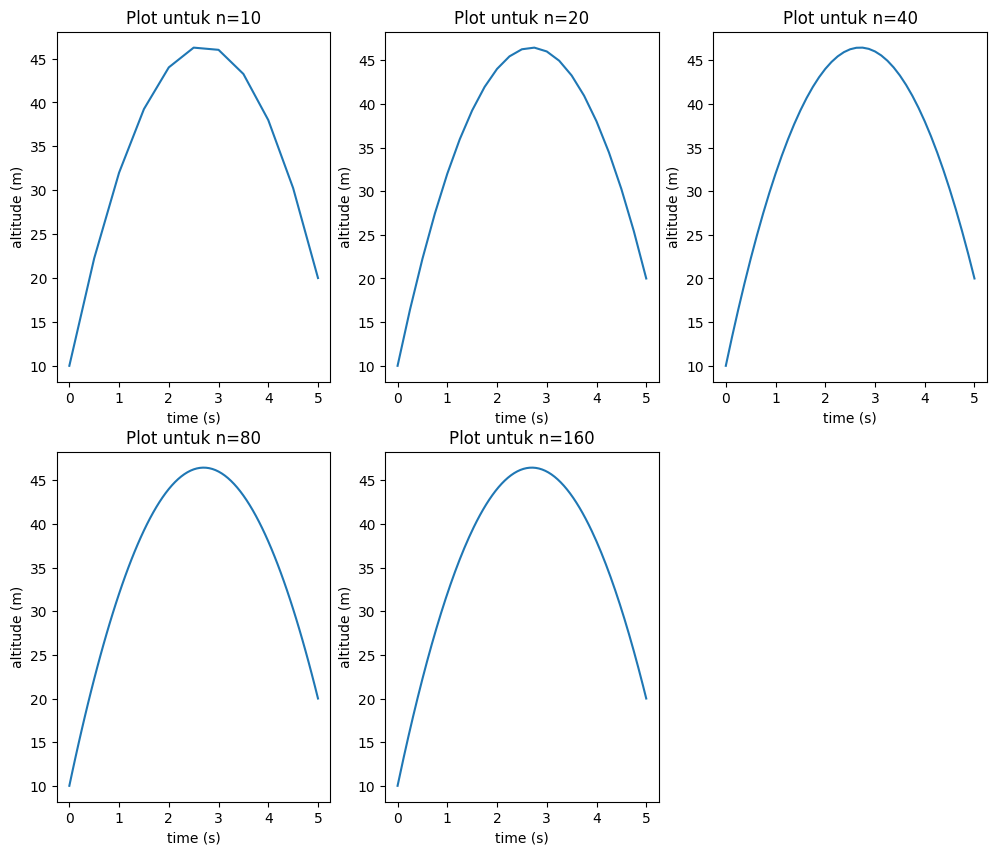

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_array = [10, 20, 40, 80, 160]
g = 10

def get_ab(n):
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1
    b = np.zeros(n+1)
    b[0] = 10
    b[1:-1] = -g*h**2
    b[-1] = 20
    return A, b

fig, ax = plt.subplots(2, 3, figsize=(12, 10))
for i, n in enumerate(n_array):
    h = (5-0) / n
    A, b = get_ab(n)
    y = np.linalg.solve(A, b)
    t = np.linspace(0, 5, n+1)
    
    if i  <= 2: # gambar plot baris 1 
        ax[0, i].plot(t, y)
        ax[0, i].set_title(f"Plot untuk n={n}")
        ax[0, i].set_xlabel('time (s)')
        ax[0, i].set_ylabel('altitude (m)')
    else:
        ax[1, i % 3].plot(t, y)
        ax[1, i % 3].set_title(f"Plot untuk n={n}")
        ax[1, i % 3].set_xlabel('time (s)')
        ax[1, i % 3].set_ylabel('altitude (m)')
ax[1, 2].axis("off")
plt.show()